In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import glob
import pickle


In [2]:
# convert gilon_speed npy
cv_num= 3
# speed_attention_csv = pd.read_csv(f'../outputs/gilon_speed/EXP2700/cv3/channel_attention_scores.csv')
speed_attention_csv = pd.read_csv(f'results/gilon_speed/channel_attention_scores.csv')
# collceted from simplevit ->cv 3. 
speed_attention_csv

y_true_unique = speed_attention_csv['y_true'].unique()
speed_regression_channel_attention_scores = {}
for y_true in y_true_unique:
    y_true_wise_df = speed_attention_csv[speed_attention_csv['y_true'] == y_true]
    # drop y_true, epoch
    y_true_wise_df = y_true_wise_df.drop(['y_true', 'epoch'], axis=1)
    speed_regression_channel_attention_scores[y_true] = y_true_wise_df.reset_index(drop=True)

In [3]:
import matplotlib.colors as mcolors


def symmetrical_colormap(cmap_settings, new_name = None ):
    ''' This function take a colormap and create a new one, as the concatenation of itself by a symmetrical fold.
    '''
    # get the colormap
    cmap = plt.cm.get_cmap(*cmap_settings)
    if not new_name:
        new_name = "sym_"+cmap_settings[0]  # ex: 'sym_Blues'
    
    # this defined the roughness of the colormap, 128 fine
    n= 128 
    
    # get the list of color from colormap
    colors_r = cmap(np.linspace(0, 1, n))    # take the standard colormap # 'right-part'
    colors_l = colors_r[::-1]                # take the first list of color and flip the order # "left-part"

    # combine them and build a new colormap
    colors = np.vstack((colors_l, colors_r))
    mymap = mcolors.LinearSegmentedColormap.from_list(new_name, colors)

    return mymap
cmap_settings = ('inferno', None)  # provide int instead of None to "discretize/bin" the colormap
mymap = symmetrical_colormap(cmap_settings= cmap_settings, new_name =None )

In [4]:
# speed_regression_channel_attention_df = pd.read_csv('results/gilonspeed/channel_attention_scores.csv')
# speed_regression_channel_attention_scores = {}
# y_true_unique = list(speed_regression_channel_attention_df.y_true.unique())
# for y_true in y_true_unique:
#     # get average attention score for each y_true, drop the y_true column
#     speed_regression_channel_attention_scores[y_true] = speed_regression_channel_attention_df[speed_regression_channel_attention_df.y_true == y_true]#.drop(columns=['y_true']).mean(axis=0)

In [5]:
channel_diff = {}
# get all combinations of channel differences
for i in speed_regression_channel_attention_scores.keys():
    for j in speed_regression_channel_attention_scores.keys():
        channel_diff[(i,j)] = speed_regression_channel_attention_scores[i] - speed_regression_channel_attention_scores[j]


In [6]:
channel_diff.keys()

dict_keys([(0.0, 0.0), (0.0, 3.0), (0.0, 3.5), (0.0, 4.0), (0.0, 4.5), (0.0, 5.0), (0.0, 5.5), (0.0, 7.0), (0.0, 7.5), (0.0, 8.0), (3.0, 0.0), (3.0, 3.0), (3.0, 3.5), (3.0, 4.0), (3.0, 4.5), (3.0, 5.0), (3.0, 5.5), (3.0, 7.0), (3.0, 7.5), (3.0, 8.0), (3.5, 0.0), (3.5, 3.0), (3.5, 3.5), (3.5, 4.0), (3.5, 4.5), (3.5, 5.0), (3.5, 5.5), (3.5, 7.0), (3.5, 7.5), (3.5, 8.0), (4.0, 0.0), (4.0, 3.0), (4.0, 3.5), (4.0, 4.0), (4.0, 4.5), (4.0, 5.0), (4.0, 5.5), (4.0, 7.0), (4.0, 7.5), (4.0, 8.0), (4.5, 0.0), (4.5, 3.0), (4.5, 3.5), (4.5, 4.0), (4.5, 4.5), (4.5, 5.0), (4.5, 5.5), (4.5, 7.0), (4.5, 7.5), (4.5, 8.0), (5.0, 0.0), (5.0, 3.0), (5.0, 3.5), (5.0, 4.0), (5.0, 4.5), (5.0, 5.0), (5.0, 5.5), (5.0, 7.0), (5.0, 7.5), (5.0, 8.0), (5.5, 0.0), (5.5, 3.0), (5.5, 3.5), (5.5, 4.0), (5.5, 4.5), (5.5, 5.0), (5.5, 5.5), (5.5, 7.0), (5.5, 7.5), (5.5, 8.0), (7.0, 0.0), (7.0, 3.0), (7.0, 3.5), (7.0, 4.0), (7.0, 4.5), (7.0, 5.0), (7.0, 5.5), (7.0, 7.0), (7.0, 7.5), (7.0, 8.0), (7.5, 0.0), (7.5, 3.0), (7.5,

In [7]:
# # fill 10 by 10 subplot with channel differences
# fig, axs = plt.subplots(10, 10, figsize=(20, 20))
# #fig.suptitle('Channel Attention Scores Difference in Gilon Speed Task', fontsize=24, y=1.05)
# for i, i_key in enumerate(speed_regression_channel_attention_scores.keys()):
#     for j,j_key in enumerate(speed_regression_channel_attention_scores.keys()):
#         sns.heatmap(channel_diff[(i_key,j_key)], ax=axs[i,j], cmap=mymap, vmin=-0.06, vmax=0.06, cbar=False, xticklabels=False, yticklabels=False)
#         axs[i,j].set_title(f'{i_key} - {j_key}', fontsize=14)
#         axs[i,j].set_xlabel('')
#         axs[i,j].set_yticks(np.arange(0, 30, 5))
#         axs[i,j].set_yticklabels(np.arange(0, 30, 5), fontsize=12)
#         axs[i,j].set_ylabel('Epochs', fontsize=14)
#         if j !=0:
#             axs[i,j].set_ylabel('')
#             axs[i,j].set_yticks([])
#         trans = axs[i,j].get_xaxis_transform()
#         axs[i,j].plot([0.3,3.1],[-0.011,-0.011], color="red", transform=trans, clip_on=False, linewidth=4)
#         axs[i,j].plot([3.2,6.1],[-0.011,-0.011], color="blue", transform=trans, clip_on=False, linewidth=4)
#         axs[i,j].plot([6.2,10.1],[-0.011,-0.011], color="green", transform=trans, clip_on=False, linewidth=4)
#         axs[i,j].plot([10.2,13.6],[-0.011,-0.011], color="#F09436", transform=trans, clip_on=False, linewidth=4)
#         axs[i,j].axvline(x=2.8, color='w', linestyle='--', linewidth=1)
#         axs[i,j].axvline(x=5.8, color='w', linestyle='--', linewidth=1)
#         axs[i,j].axvline(x=9.8, color='w', linestyle='--', linewidth=1)
#         axs[i,j].axvline(x=13.8, color='w', linestyle='--', linewidth=1)
# fig.legend(['Accelerometer Right', 'Accelerometer Left', 'FSR Right', 'FSR Left'], loc='upper center', ncol=4, fontsize=20,
#             bbox_to_anchor=(0.5, -0.005),fancybox=False, shadow=False)
# plt.tight_layout()
# plt.savefig('results/gilon_speed/channel_attention_score_difference_all.png', dpi=300, bbox_inches='tight')

In [8]:
diff_3 = speed_regression_channel_attention_scores[0] - speed_regression_channel_attention_scores[3]
diff_4 = speed_regression_channel_attention_scores[0] - speed_regression_channel_attention_scores[4]
diff_5 = speed_regression_channel_attention_scores[0] - speed_regression_channel_attention_scores[5]
diff_7 = speed_regression_channel_attention_scores[0] - speed_regression_channel_attention_scores[7]
diff_8 = speed_regression_channel_attention_scores[0] - speed_regression_channel_attention_scores[8]

/tmp/ipykernel_349374/4018844449.py:47: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.1, wspace=0.33)


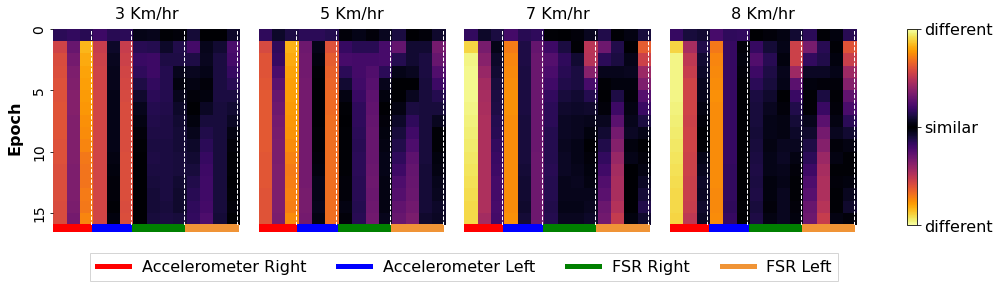

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(18, 3.5),
                         gridspec_kw={'wspace':0.1},
                         constrained_layout=True, )
abs_value = 0.06
# set title for all subplots, set y tick labels false for all but the first
#fig.suptitle('Channel Attention Score Difference with 0 Km/hr', fontsize=20, fontweight='bold', y=1.1, x=0.46)
sns.heatmap(diff_3, ax=axes[0], cmap=mymap, cbar=False, vmin=-abs_value, vmax=abs_value)
# place spacing between title and subplot
axes[0].set_title('3 Km/hr', fontsize=16,  pad=10)
# set y tick labels np.arange(0, 10, 2)


sns.heatmap(diff_5, ax=axes[1], cmap=mymap, cbar=False, vmin=-abs_value, vmax=abs_value)
axes[1].set_title('5 Km/hr', fontsize=16,  pad=10)
sns.heatmap(diff_7, ax=axes[2], cmap=mymap, cbar=False, vmin=-abs_value, vmax=abs_value)
axes[2].set_title('7 Km/hr', fontsize=16,  pad=10)
sns.heatmap(diff_8, ax=axes[3], cmap=mymap, cbar=False, vmin=-abs_value, vmax=abs_value)
axes[3].set_title('8 Km/hr', fontsize=16,  pad=10)
# show colorbar next to axes[3], set its label and ticklabels, set ticklabels as [high, low, high]



for i in range(4):
    # remove xticklabels
    axes[i].set_xticklabels([])
    # remove yticklabels
    axes[i].set_yticklabels([])
    # remove xticks
    axes[i].set_xticks([])
    # remove yticks
    axes[i].set_yticks([])
    # place red vertical line at 3
    trans = axes[i].get_xaxis_transform()
    axes[i].plot([0.3,3.1],[-0.011,-0.011], color="red", transform=trans, clip_on=False, linewidth=8)
    axes[i].plot([3.2,6.1],[-0.011,-0.011], color="blue", transform=trans, clip_on=False, linewidth=8)
    axes[i].plot([6.2,10.1],[-0.011,-0.011], color="green", transform=trans, clip_on=False, linewidth=8)
    axes[i].plot([10.2,13.6],[-0.011,-0.011], color="#F09436", transform=trans, clip_on=False, linewidth=8)
    # axes[i].axhline(y=27, color='blue', linestyle='-', linewidth=8, xmin=3/14, xmax=6/14)
    # axes[i].axhline(y=27, color='green', linestyle='-', linewidth=8, xmin=6/14, xmax=10/14)
    # axes[i].axhline(y=27, color='#F09436', linestyle='-', linewidth=8, xmin=10/14, xmax=1)
    axes[i].axvline(x=2.8, color='w', linestyle='--', linewidth=1)
    axes[i].axvline(x=5.8, color='w', linestyle='--', linewidth=1)
    axes[i].axvline(x=9.8, color='w', linestyle='--', linewidth=1)
    axes[i].axvline(x=13.8, color='w', linestyle='--', linewidth=1)

# create legends for the axvlines 
fig.subplots_adjust(bottom=0.1, wspace=0.33)
axes[0].legend(['Accelerometer Right', 'Accelerometer Left', 'FSR Right', 'FSR Left'], fontsize=16,loc='upper center', 
             bbox_to_anchor=(2.2, -0.1),fancybox=False, shadow=False, ncol=4)
leg = axes[0].get_legend()
for line in leg.get_lines():
    line.set_linewidth(5.0)
# set y ticks
axes[0].set_yticks(np.arange(0, 20, 5))
# set y tick label for the first axes
axes[0].set_yticklabels(np.arange(0, 20, 5), fontsize=14)
# set y label
axes[0].set_ylabel('Epoch', fontsize=16, fontweight='bold', labelpad=10)

cbar = fig.colorbar(axes[3].collections[0], ax=axes,location='right', shrink=1,
             label='', ticks=[-abs_value, 0, abs_value])
# set cbar label fontsize

# set yticklabels and large font size
cbar.ax.set_yticklabels(['different', 'similar', 'different'], fontsize=16)

# # save
plt.savefig('results/gilon_speed/channel_attention_score_difference.png', dpi=300, bbox_inches='tight')